In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pymultifracs.simul import mrw
from pymultifracs import wavelet_analysis
from pymultifracs import mfa
from pymultifracs.utils import build_q_log
from sktime.libs.vmdpy import VMD

In [13]:
nb_generated_series = 1
X = mrw(shape=(2**15, nb_generated_series), H=0.8, lam=np.sqrt(.05), L=2**15)

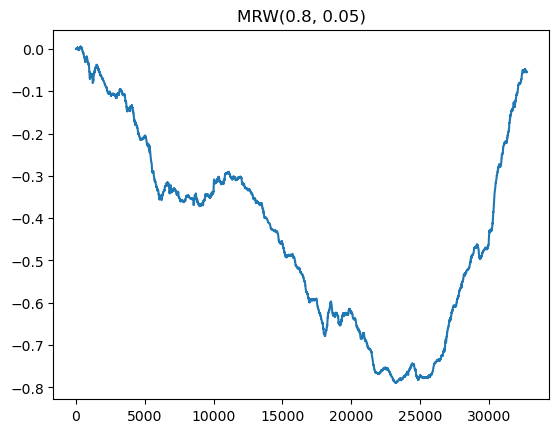

In [14]:
plt.plot(X)
plt.title('MRW(0.8, 0.05)')
plt.show()

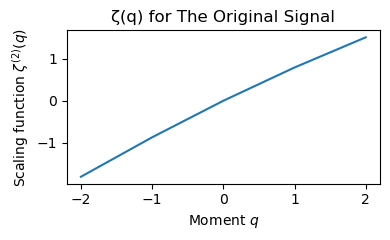

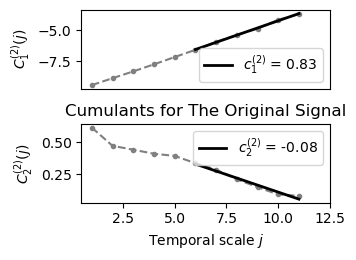

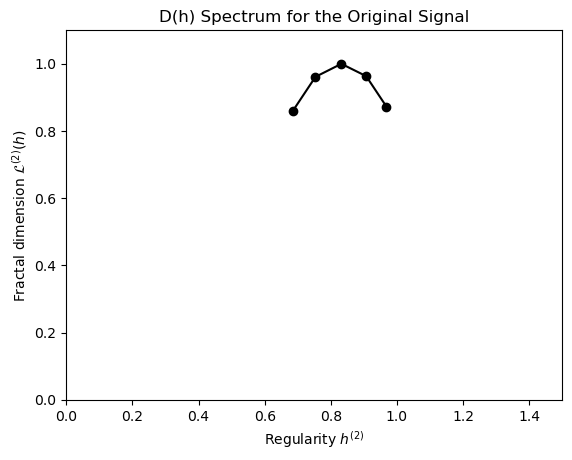

In [15]:
WT = wavelet_analysis(X, wt_name='db3')
WTpL = WT.get_leaders(p_exp=2)
WTpL = WTpL.auto_integrate([[6, 11]])
pwt = mfa(WTpL, scaling_ranges=[[6, 11]], q=[-2, -1, 0, 1, 2])

# Plot ζ(q)
pwt_k.structure.plot_scaling()
plt.title(f"ζ(q) for The Original Signal")
plt.show()

# Plot cumulants
pwt_k.cumulants.plot()
plt.title(f"Cumulants for The Original Signal")
plt.show()

# Plot D(h)
pwt_k.spectrum.plot()
plt.title(f"D(h) Spectrum for the Original Signal")
plt.show()

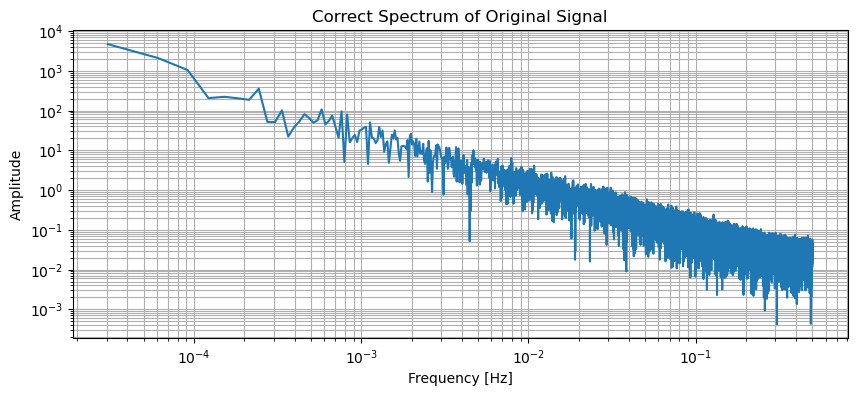

In [24]:
f = X[:, 0]
T = len(f)
f_hat = np.fft.fftshift(np.fft.fft(f))
freqs = np.fft.fftshift(np.fft.fftfreq(T, d=1))

# Correct masking after shift
mask = freqs > 0

plt.figure(figsize=(10, 4))
plt.loglog(freqs[mask], np.abs(f_hat[mask]))
plt.grid(True, which='both')
plt.title("Correct Spectrum of Original Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()


In [18]:
# Input signal x
u, u_hat, omega = VMD(X, alpha=2000, tau=0, K=3, DC=0, init=1, tol=1e-7)

In [19]:
# For convenience here: Order omegas increasingly and reindex u/u_hat
sortIndex = np.argsort(omega[-1,:])
omega = omega[:,sortIndex]
u_hat = u_hat[:,sortIndex]
u = u[sortIndex,:]
linestyles = ['b', 'g', 'm', 'c', 'c', 'r', 'k']

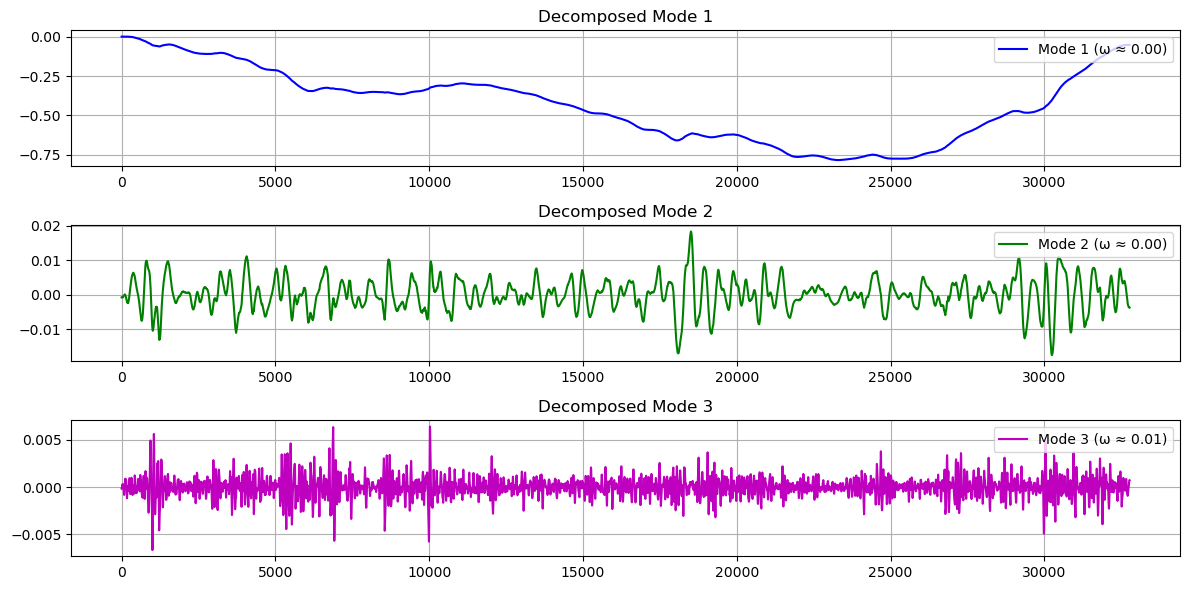

In [20]:
#Plot Each Reordered Mode

K = u.shape[0]
linestyles = ['b', 'g', 'm', 'c', 'r', 'k', 'y']  # Add more if K > 7

plt.figure(figsize=(12, 2 * K))

for k in range(K):
    plt.subplot(K, 1, k + 1)
    plt.plot(u[k, :], linestyles[k % len(linestyles)], label=f'Mode {k+1} (ω ≈ {omega[-1, k]:.2f})')
    plt.title(f'Decomposed Mode {k+1}')
    plt.grid(True)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


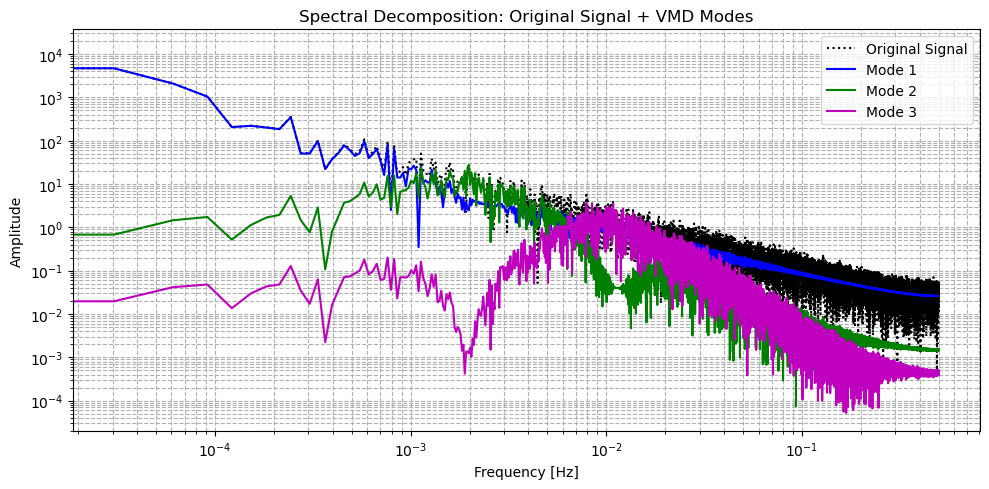

In [25]:
# Recompute FFT and frequency axis from original MRW signal
f = X[:, 0]
T = len(f)
f_hat = np.fft.fftshift(np.fft.fft(f))
freqs = np.fft.fftshift(np.fft.fftfreq(T, d=1))  # fs = 1

# Get only positive half (right side of FFT)
freqs_pos = freqs[T//2:]
f_hat_pos = np.abs(f_hat[T//2:])

# Prepare the figure
plt.figure(figsize=(10, 5))

# Plot the original signal spectrum
plt.loglog(freqs_pos, f_hat_pos, 'k:', label='Original Signal')

# Plot each VMD mode spectrum
linestyles = ['b', 'g', 'm', 'c', 'r', 'y', 'orange']
K = u_hat.shape[1]

for k in range(K):
    u_hat_k = np.abs(u_hat[T//2:, k])  # Positive frequencies only
    if np.any(u_hat_k > 0):
        plt.loglog(freqs_pos, u_hat_k, linestyles[k % len(linestyles)], label=f'Mode {k+1}')

# Final plot settings
plt.title("Spectral Decomposition: Original Signal + VMD Modes")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Evolution of center frequencies omega')

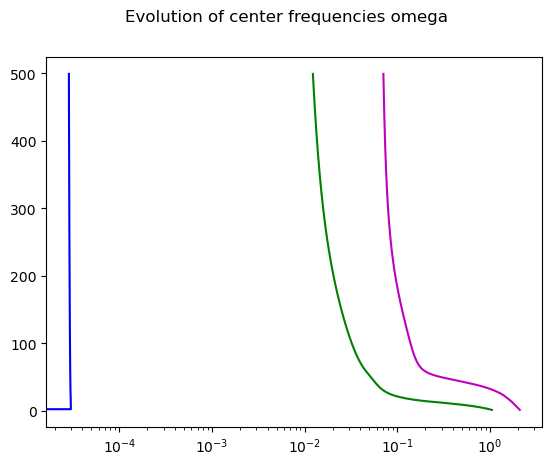

In [28]:
# The evolution of center frequencies

fig3 = plt.figure()
for k in range(K):
    plt.semilogx(2*np.pi/fs*omega[:,k], np.arange(1,omega.shape[0]+1), linestyles[k])
fig3.suptitle('Evolution of center frequencies omega')

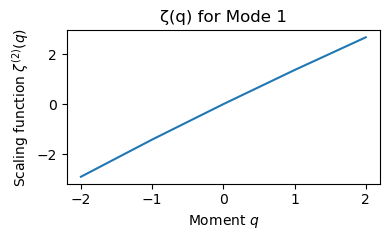

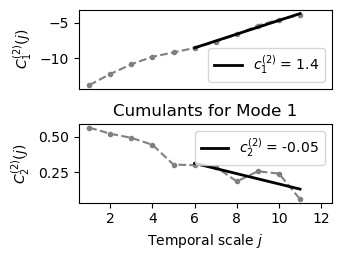

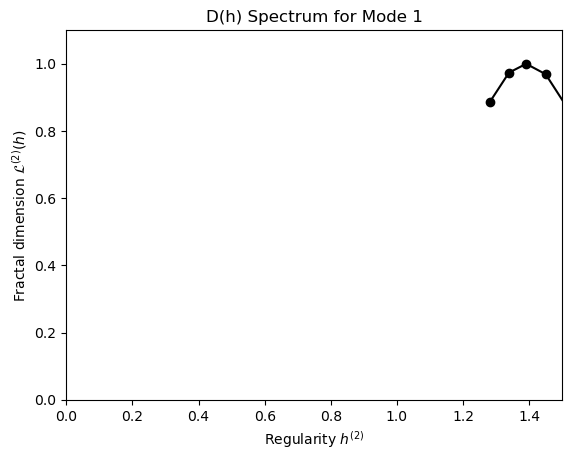

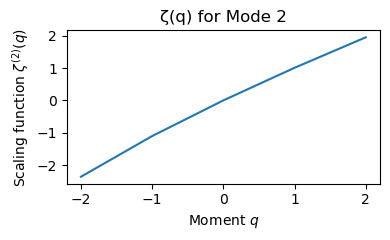

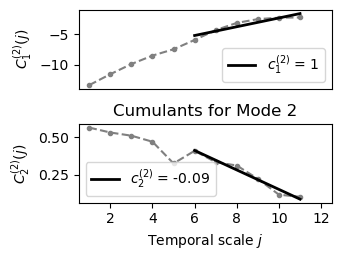

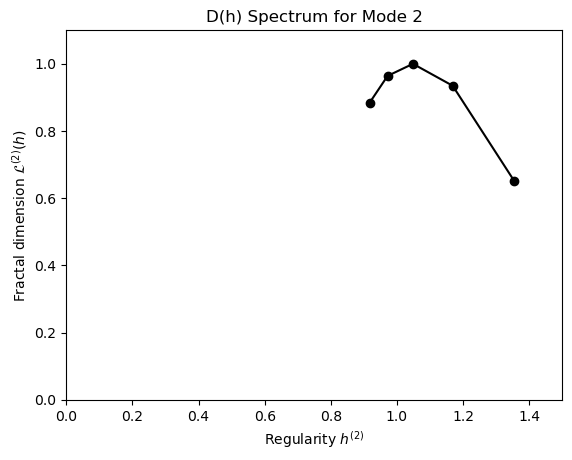

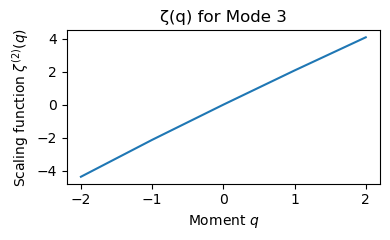

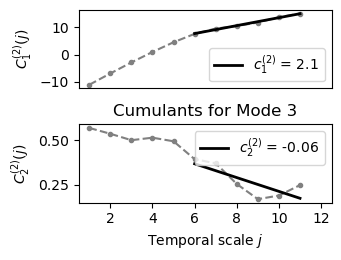

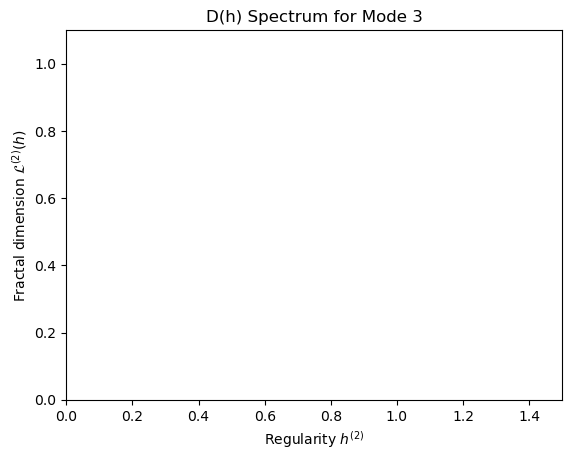

In [26]:
for k in range(K):
    WT_k = wavelet_analysis(u[k], wt_name='db3')
    WTpL_k = WT_k.get_leaders(p_exp=2)
    WTpL_k = WTpL_k.auto_integrate([[6, 11]])
    pwt_k = mfa(WTpL_k, scaling_ranges=[[6, 11]], q=[-2, -1, 0, 1, 2])

    # Plot ζ(q)
    pwt_k.structure.plot_scaling()
    plt.title(f"ζ(q) for Mode {k+1}")
    plt.show()

    # Plot cumulants
    pwt_k.cumulants.plot()
    plt.title(f"Cumulants for Mode {k+1}")
    plt.show()

    # Plot D(h)
    pwt_k.spectrum.plot()
    plt.title(f"D(h) Spectrum for Mode {k+1}")
    plt.show()
